# MONTE CARLO DROPOUT
Incerteza Epistêmica em Redes Neurais - Gerson Eduardo de Mello 

Esta é uma aplicação do método de incerteza em redes neurais proposto por Yarin Gal. O Dataset escolhido foi O 
Airfoil Self-Noise Data Set (http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise ) retirado do UCL Machine Learn Repository. A variável predita escolhida foi a "Pressure" e todas as demais foram consideradas como variáveis preditoras. 

#Descrição do método proposto por Yarin Gal: 

Em 2015, Yarin Gal mostrou que é possível obter incerteza a partir de redes neurais quase que gratuitamente, se olhássemos técnicas de regularização estocásticas, como Dropout, sob uma perspectiva Bayesiana. Dropout (Srivastava et al, 2014) é uma técnica utilizada na maioria das redes neurais modernas para prevenir sobre-ajustamento. Durante o treinamento, Dropout funciona zerando aleatoriamente uma percentagens de neurônios nas camadas da rede neural. No momento de fazer previsões, todos os neurônios são mantidos e a rede neural atua como uma grande mistura de sub-redes menores.
Durante o treinamento do modelo, nada muda; mas, durante o teste mantemos a probabilidade de Dropout fixada durante o treino e realizamos T  forward-pass pela rede, coletando assim T  previsões y para cada amostra. Assim para cada ponto teremos uma previsão para a média e uma previsão para a variância, que será nossa medida de incerteza.
 

In [1]:
# Importando as bibliotecas necessárias para importação dos datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2


In [3]:
# importando os dados  

In [4]:
df=pd.read_csv('airfoil.csv')

In [5]:
df

,Frequency,Angle,Length,Velocity,Suction Side,Pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [6]:
df.describe()

,Frequency,Angle,Length,Velocity,Suction Side,Pressure
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


Avaliando a distribuição dos dados para avaliar qual o melhor tratamento estatístico para os dados. Caso as distribuições sejam aproximadamente normaisos dados serão padronizados. Caso contrário os dados serão normalizados. 


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

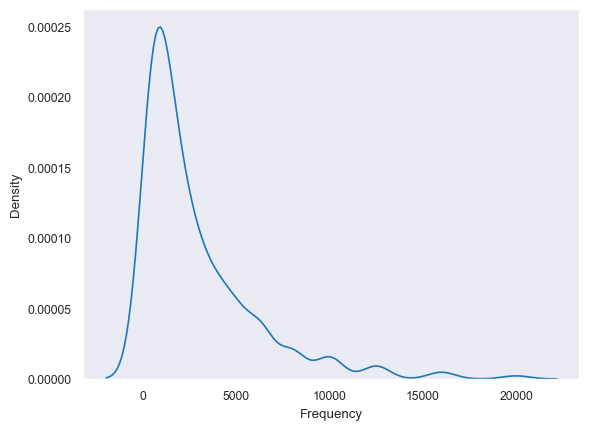

In [13]:
sns.kdeplot(df['Frequency'], )

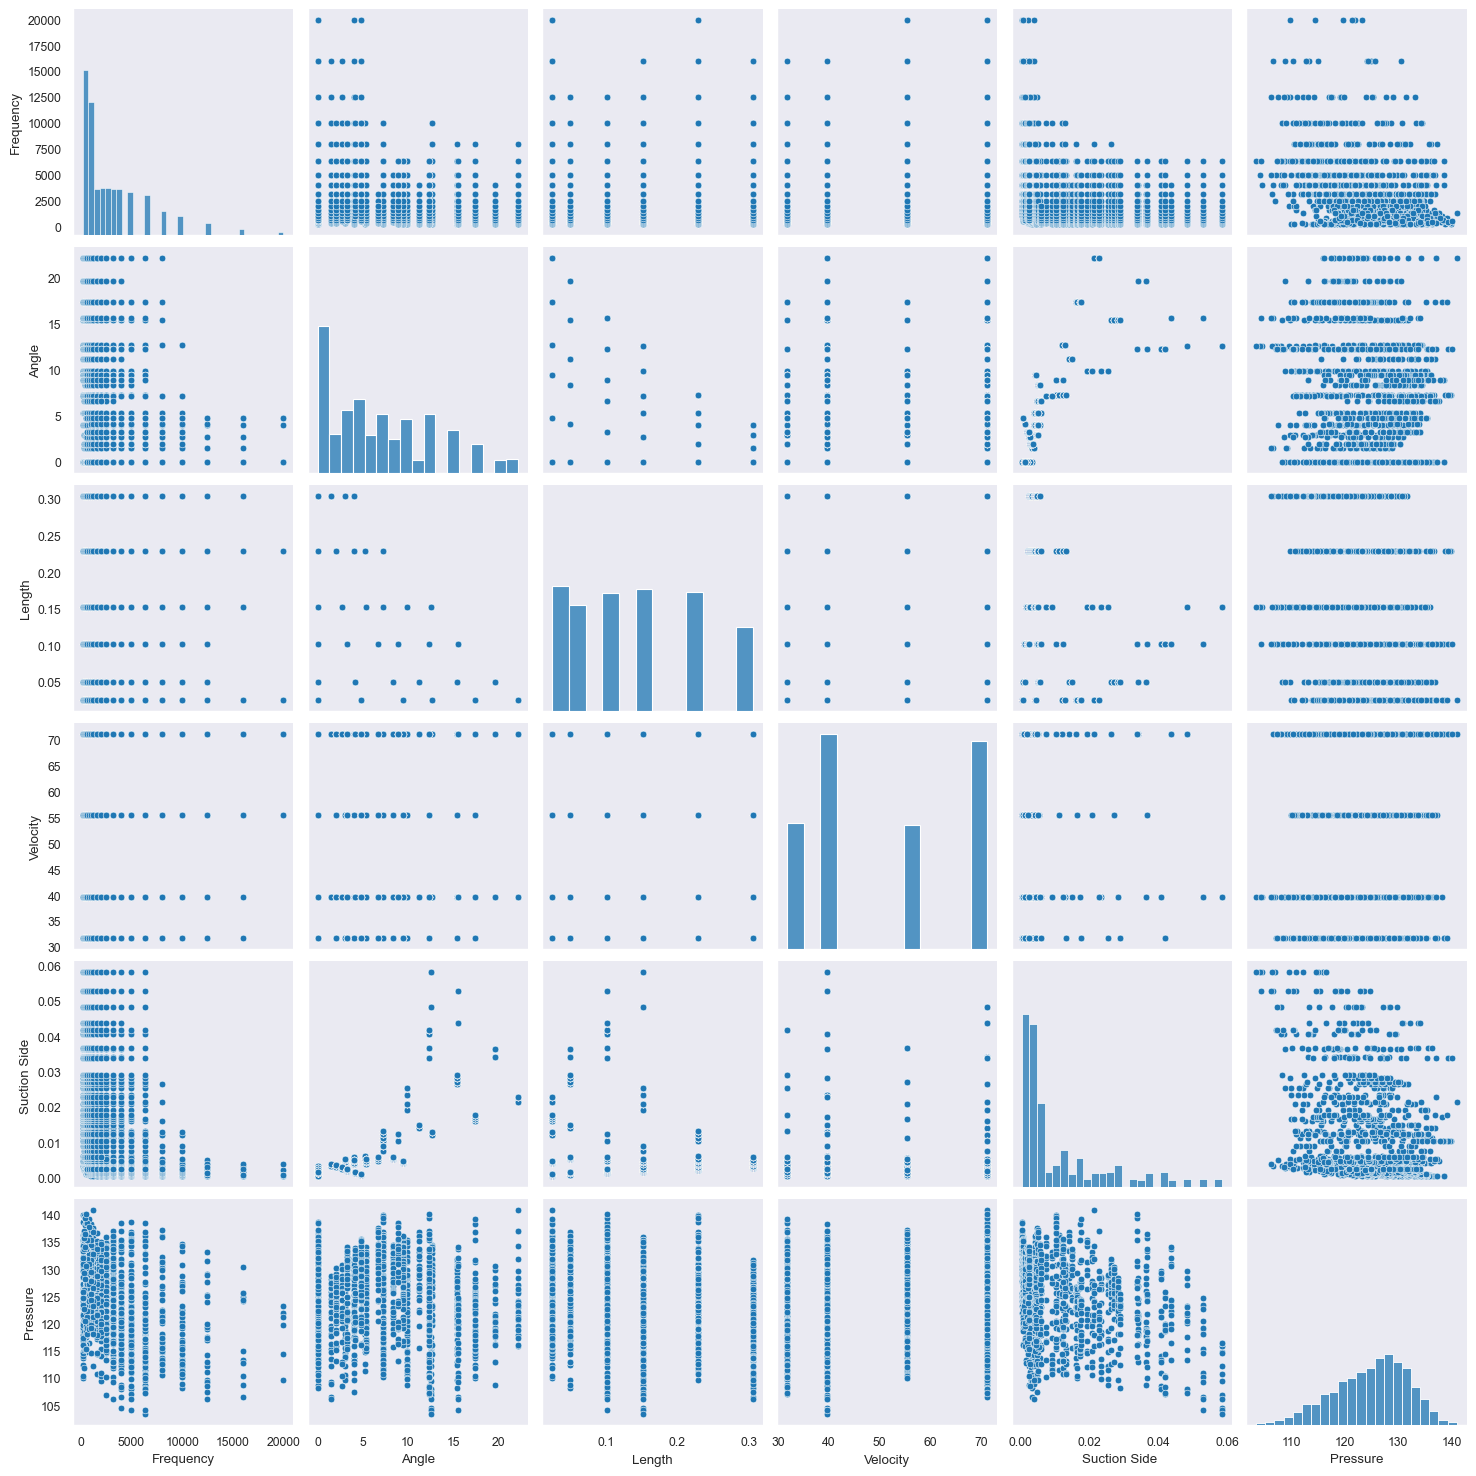

In [14]:
sns.pairplot(df,)# mostra todos os pares de vaariáveis e os histogramas 

Após a avaliação da distribuição dos dados para cada uma das variáveis, pode-se aplicar a normalização que é a mais apropriada do que a padronização uma vez que oas distribuições não seguem uma normalidade

In [17]:
from sklearn.preprocessing import MinMaxScaler #pacote para realizar a normalização dos dados 

In [18]:
df


,Frequency,Angle,Length,Velocity,Suction Side,Pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [19]:
scaler=MinMaxScaler(feature_range=(0,1)) # aqui os dados são normalizadosentre 0 e 1 . 
df_n = scaler.fit_transform(df)
print(df_n)

[[0.03030303 0.         1.         1.         0.03900472 0.60682852]
 [0.04040404 0.         1.         1.         0.03900472 0.58023772]
 [0.0530303  0.         1.         1.         0.03900472 0.60018082]
 ...
 [0.19191919 0.7027027  0.27272727 0.19949495 0.90411066 0.08572872]
 [0.24242424 0.7027027  0.27272727 0.19949495 0.90411066 0.07562422]
 [0.30808081 0.7027027  0.27272727 0.19949495 0.90411066 0.02191081]]


In [20]:
df_n=pd.DataFrame(df_n) # transformação dos dados para um Dataframe  usando o pacote pandas 

In [21]:
df_n

,0,1,2,3,4,5
0,0.030303,0.000000,1.000000,1.000000,0.039005,0.606829
1,0.040404,0.000000,1.000000,1.000000,0.039005,0.580238
2,0.053030,0.000000,1.000000,1.000000,0.039005,0.600181
3,0.070707,0.000000,1.000000,1.000000,0.039005,0.643790
4,0.090909,0.000000,1.000000,1.000000,0.039005,0.640333
...,...,...,...,...,...,...
1498,0.116162,0.702703,0.272727,0.199495,0.904111,0.183051
1499,0.148990,0.702703,0.272727,0.199495,0.904111,0.156194
1500,0.191919,0.702703,0.272727,0.199495,0.904111,0.085729
1501,0.242424,0.702703,0.272727,0.199495,0.904111,0.075624


In [22]:
y=df_n[5]# designação da variáel de saída  (y) 

In [23]:
X=df_n[df_n.columns[0:5]]# designação das variáveis de entrada (x1,x2,x3,x4,x5)

In [24]:
X

,0,1,2,3,4
0,0.030303,0.000000,1.000000,1.000000,0.039005
1,0.040404,0.000000,1.000000,1.000000,0.039005
2,0.053030,0.000000,1.000000,1.000000,0.039005
3,0.070707,0.000000,1.000000,1.000000,0.039005
4,0.090909,0.000000,1.000000,1.000000,0.039005
...,...,...,...,...,...
1498,0.116162,0.702703,0.272727,0.199495,0.904111
1499,0.148990,0.702703,0.272727,0.199495,0.904111
1500,0.191919,0.702703,0.272727,0.199495,0.904111
1501,0.242424,0.702703,0.272727,0.199495,0.904111


Agora vamos separar os dados de treino e de teste.Para melhor visualização do desempenho do teste serão selecionados 30 dados aleatórios para o teste.Os demais serão para o treino.  

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, shuffle=True, random_state=32)

In [26]:
X_test # visualizando os dados de teste para as variáveis x

,0,1,2,3,4
1154,0.040404,0.783784,0.000000,1.000000,0.270697
475,0.116162,0.000000,0.454545,0.601010,0.022858
458,0.090909,0.000000,0.454545,1.000000,0.020653
43,0.242424,0.000000,1.000000,0.199495,0.046555
533,0.116162,0.121622,0.454545,0.199495,0.043912
1366,0.070707,0.301802,0.272727,0.199495,0.092743
537,0.308081,0.121622,0.454545,0.199495,0.043912
273,0.015152,0.090090,0.727273,0.199495,0.052836
428,0.030303,0.328829,0.727273,0.199495,0.205952
381,0.040404,0.238739,0.727273,0.199495,0.098992


In [27]:
y_train # visualizando os dados de treino para as variáveis y

1134    0.677720
600     0.868003
1201    0.953174
1010    0.838886
829     0.414152
          ...   
1427    0.858723
88      0.497806
892     0.719281
1334    0.787938
727     0.669556
Name: 5, Length: 1472, dtype: float64

In [28]:
y_test # visualizando os dados de teste para as variáveis y

1154    0.596591
475     0.648363
458     0.671870
43      0.383147
533     0.590555
1366    0.638046
537     0.420906
273     0.579068
428     0.609434
381     0.590342
895     0.659984
1085    0.545484
1101    0.625043
1065    0.820486
366     0.720079
803     0.820220
1084    0.472625
403     0.420879
282     0.447975
1210    0.331773
1450    0.385434
1493    0.414391
370     0.450714
1436    0.363603
385     0.339591
1125    0.755923
1073    0.766400
1465    0.409153
97      0.643072
1219    0.604063
355     0.447496
Name: 5, dtype: float64

Importando bibliotecas para construção da rede neural 

In [30]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

Parametrização da NN

In [32]:
n_input = 5  # numero de entradas das rede neural 
num_out = 1
p_dropout = 0.5 # probabilidade dropout 

lbd = 1e-4  # L2- força de regularização 

model = Sequential()
model.add(Dropout(.05, input_shape=(n_input,)))
model.add(Dense(100, activation='relu', input_shape=(n_input,), kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(100, activation='relu', kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(num_out, activation=None))
model.summary()

opt = Adam(lr=1e-3) 

model.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['mean_absolute_error'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 100)               600       
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,801
Trainable params: 10,801
Non-traina

C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Treinamos nossa rede por 10000 interações. Com lote de 1 amostra por época

In [34]:
epochs = 10000
model.fit(X_train, y_train,
            batch_size=X_train.shape[0] // 1,
            epochs=epochs,
            verbose=0)

Avaliamos a performance do modelo MAE, RMSE e R²

In [36]:
from sklearn import metrics

y_hat_train = model.predict(X_train)


46/46 [==============================] - 0s 640us/step


In [37]:
y_hat_test = model.predict(X_test)


1/1 [==============================] - 0s 41ms/step


In [38]:
# métricas do treino

In [39]:
MAE_T=metrics.mean_absolute_error(y_train, y_hat_train)
R2_T=metrics.r2_score(y_train, y_hat_train);
RMSE_T=metrics.mean_squared_error(y_train, y_hat_train)

In [40]:
MAE_T,R2_T,RMSE_T

(0.04876342679621228, 0.8721054843220593, 0.004336353929476571)

In [41]:
# métricas do teste

In [42]:
MAE_t=metrics.mean_absolute_error(y_test, y_hat_test)
R2_t=metrics.r2_score(y_test, y_hat_test);
RMSE_t=metrics.mean_squared_error(y_test, y_hat_test)

In [43]:
MAE_t,R2_t,RMSE_t

(0.04644562177880837, 0.8506805994888532, 0.003011318454901812)

Elaboração do gráfico ordenando os dados em ordem e plotando os valores reais e predito no conjunto de teste 

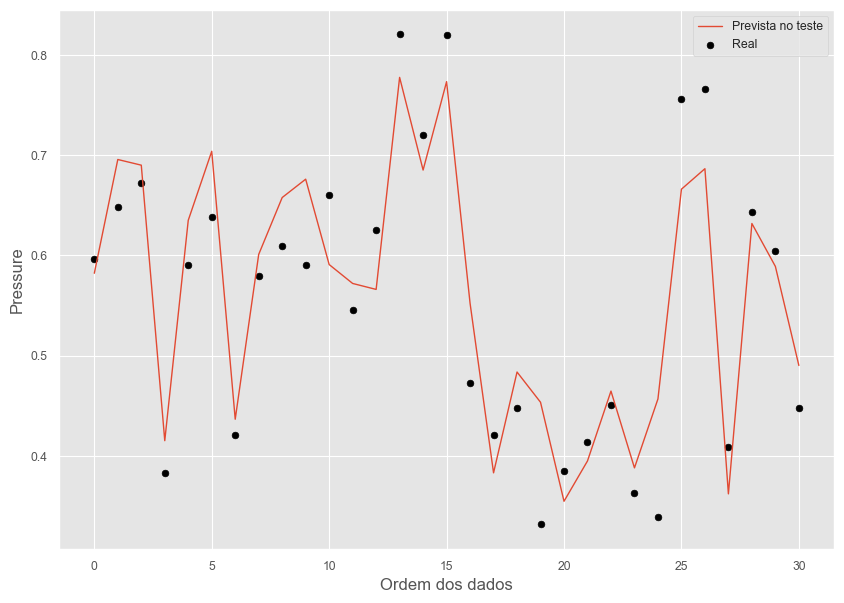

In [49]:
# avaliação conjunto de teste
n = 31
plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(range(n), y_hat_test, label="Prevista no teste", lw=1)
plt.scatter(range(n), y_test, color="black", label="Real")
plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda1.png")
plt.show()

Acima, a previsão é feita da forma tradicional, isto é, colocando a probabilidade de Dropout em 0%, usando assim toda a capacidade da rede. Esse é o padrão do Keras e precisaremos rescrevê-lo para implementar Monte-Carlo Dropout, no qual mantemos as probabilidades de Dropout de treino também durante as previsões. Abaixo, vamos definir uma função que retornará a última camada da rede, (as previsões) dada a camada de entrada (as variáveis). Além disso, vamos definir que está função será usada tal como durante o treinamento, passando K.learning_phase().
Abaixo realizamos 1000 forwad-passes pela rede neural e obtemos 1000 previsões para cada ponto.

In [50]:
import tensorflow as tf
import numpy as np
from keras import backend as K

T = 1000

tf.keras.backend.set_learning_phase(1)

predict_stochastic = K.function([model.layers[0].input], [model.layers[-1].output])

y_hat_mc = np.array([predict_stochastic([X_test]) for _ in range(T)])

y_hat_mc = y_hat_mc.reshape(-1, y_test.shape[0]).T

C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [51]:
y_hat_mc.shape # 31 linhas com 1000 colunas que representam os 1000 resultados para casa vetor teste 

(31, 1000)

In [52]:
# para cada amostra, foram calculados 1000 resultados com base no Dropout . Vamos ver o dataframe :

In [53]:
yhat=pd.DataFrame(y_hat_mc)

In [54]:
yhat

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.621154,0.652410,0.553840,0.647201,0.577613,0.566656,0.527959,0.584945,0.557694,0.629094,...,0.593200,0.669915,0.538718,0.597310,0.508274,0.715125,0.553594,0.658078,0.633444,0.716529
1,0.737343,0.662356,0.621329,0.728089,0.706636,0.662890,0.707885,0.697665,0.671797,0.696674,...,0.749246,0.723445,0.709740,0.639017,0.606541,0.692146,0.647359,0.680785,0.680782,0.600995
2,0.704961,0.703843,0.753207,0.672686,0.739990,0.691043,0.671329,0.774510,0.662670,0.678318,...,0.729515,0.657363,0.672576,0.674842,0.734039,0.781889,0.655884,0.682393,0.675384,0.719542
3,0.456532,0.350422,0.381686,0.348637,0.585862,0.636289,0.447693,0.377018,0.441431,0.387116,...,0.328709,0.356314,0.426881,0.416475,0.557185,0.434988,0.386502,0.443096,0.427471,0.408902
4,0.695287,0.580354,0.676417,0.737305,0.600031,0.563510,0.626067,0.605786,0.666110,0.616618,...,0.631821,0.615059,0.627545,0.573929,0.564880,0.612922,0.661137,0.801261,0.668284,0.546426
5,0.689596,0.771087,0.650768,0.703894,0.723014,0.716769,0.700846,0.772972,0.631785,0.646850,...,0.634551,0.661402,0.695901,0.676245,0.715289,0.735047,0.752676,0.693504,0.665521,0.689522
6,0.477920,0.635011,0.411145,0.637680,0.438552,0.375166,0.491993,0.412674,0.352140,0.343226,...,0.418033,0.401366,0.387130,0.416457,0.430062,0.438681,0.402377,0.376347,0.426738,0.404074
7,0.631478,0.635975,0.621683,0.660396,0.609237,0.570061,0.530294,0.621303,0.566921,0.641161,...,0.645457,0.632273,0.627467,0.632070,0.703173,0.550611,0.628816,0.641518,0.653721,0.619344
8,0.626067,0.626263,0.649780,0.552587,0.667336,0.644057,0.719682,0.576052,0.683958,0.619498,...,0.634358,0.662603,0.748180,0.542579,0.689892,0.657092,0.640168,0.531399,0.622229,0.685302
9,0.633563,0.604071,0.644266,0.633498,0.635597,0.654478,0.653473,0.676579,0.671200,0.640906,...,0.686718,0.674560,0.637202,0.589790,0.633411,0.646968,0.658268,0.585646,0.632620,0.681306


In [55]:
#vamos calcular a média dos 1000 resultados para cada amostra de teste

In [56]:
yhat['mean']=yhat.apply(np.mean,axis=1)

In [57]:
yhat

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,mean
0,0.621154,0.652410,0.553840,0.647201,0.577613,0.566656,0.527959,0.584945,0.557694,0.629094,...,0.669915,0.538718,0.597310,0.508274,0.715125,0.553594,0.658078,0.633444,0.716529,0.582993
1,0.737343,0.662356,0.621329,0.728089,0.706636,0.662890,0.707885,0.697665,0.671797,0.696674,...,0.723445,0.709740,0.639017,0.606541,0.692146,0.647359,0.680785,0.680782,0.600995,0.674219
2,0.704961,0.703843,0.753207,0.672686,0.739990,0.691043,0.671329,0.774510,0.662670,0.678318,...,0.657363,0.672576,0.674842,0.734039,0.781889,0.655884,0.682393,0.675384,0.719542,0.687328
3,0.456532,0.350422,0.381686,0.348637,0.585862,0.636289,0.447693,0.377018,0.441431,0.387116,...,0.356314,0.426881,0.416475,0.557185,0.434988,0.386502,0.443096,0.427471,0.408902,0.421091
4,0.695287,0.580354,0.676417,0.737305,0.600031,0.563510,0.626067,0.605786,0.666110,0.616618,...,0.615059,0.627545,0.573929,0.564880,0.612922,0.661137,0.801261,0.668284,0.546426,0.620183
5,0.689596,0.771087,0.650768,0.703894,0.723014,0.716769,0.700846,0.772972,0.631785,0.646850,...,0.661402,0.695901,0.676245,0.715289,0.735047,0.752676,0.693504,0.665521,0.689522,0.680075
6,0.477920,0.635011,0.411145,0.637680,0.438552,0.375166,0.491993,0.412674,0.352140,0.343226,...,0.401366,0.387130,0.416457,0.430062,0.438681,0.402377,0.376347,0.426738,0.404074,0.430375
7,0.631478,0.635975,0.621683,0.660396,0.609237,0.570061,0.530294,0.621303,0.566921,0.641161,...,0.632273,0.627467,0.632070,0.703173,0.550611,0.628816,0.641518,0.653721,0.619344,0.607719
8,0.626067,0.626263,0.649780,0.552587,0.667336,0.644057,0.719682,0.576052,0.683958,0.619498,...,0.662603,0.748180,0.542579,0.689892,0.657092,0.640168,0.531399,0.622229,0.685302,0.630682
9,0.633563,0.604071,0.644266,0.633498,0.635597,0.654478,0.653473,0.676579,0.671200,0.640906,...,0.674560,0.637202,0.589790,0.633411,0.646968,0.658268,0.585646,0.632620,0.681306,0.650964


In [58]:
#separamos novamente os 1000 resultados retirando a coluna média 

In [59]:
yhatd=yhat.iloc[:,0:1000]

In [60]:
yhatd

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.621154,0.652410,0.553840,0.647201,0.577613,0.566656,0.527959,0.584945,0.557694,0.629094,...,0.593200,0.669915,0.538718,0.597310,0.508274,0.715125,0.553594,0.658078,0.633444,0.716529
1,0.737343,0.662356,0.621329,0.728089,0.706636,0.662890,0.707885,0.697665,0.671797,0.696674,...,0.749246,0.723445,0.709740,0.639017,0.606541,0.692146,0.647359,0.680785,0.680782,0.600995
2,0.704961,0.703843,0.753207,0.672686,0.739990,0.691043,0.671329,0.774510,0.662670,0.678318,...,0.729515,0.657363,0.672576,0.674842,0.734039,0.781889,0.655884,0.682393,0.675384,0.719542
3,0.456532,0.350422,0.381686,0.348637,0.585862,0.636289,0.447693,0.377018,0.441431,0.387116,...,0.328709,0.356314,0.426881,0.416475,0.557185,0.434988,0.386502,0.443096,0.427471,0.408902
4,0.695287,0.580354,0.676417,0.737305,0.600031,0.563510,0.626067,0.605786,0.666110,0.616618,...,0.631821,0.615059,0.627545,0.573929,0.564880,0.612922,0.661137,0.801261,0.668284,0.546426
5,0.689596,0.771087,0.650768,0.703894,0.723014,0.716769,0.700846,0.772972,0.631785,0.646850,...,0.634551,0.661402,0.695901,0.676245,0.715289,0.735047,0.752676,0.693504,0.665521,0.689522
6,0.477920,0.635011,0.411145,0.637680,0.438552,0.375166,0.491993,0.412674,0.352140,0.343226,...,0.418033,0.401366,0.387130,0.416457,0.430062,0.438681,0.402377,0.376347,0.426738,0.404074
7,0.631478,0.635975,0.621683,0.660396,0.609237,0.570061,0.530294,0.621303,0.566921,0.641161,...,0.645457,0.632273,0.627467,0.632070,0.703173,0.550611,0.628816,0.641518,0.653721,0.619344
8,0.626067,0.626263,0.649780,0.552587,0.667336,0.644057,0.719682,0.576052,0.683958,0.619498,...,0.634358,0.662603,0.748180,0.542579,0.689892,0.657092,0.640168,0.531399,0.622229,0.685302
9,0.633563,0.604071,0.644266,0.633498,0.635597,0.654478,0.653473,0.676579,0.671200,0.640906,...,0.686718,0.674560,0.637202,0.589790,0.633411,0.646968,0.658268,0.585646,0.632620,0.681306


In [61]:
#vamos calcular o desvio padrão dos 1000 resultados dos dados de teste

In [62]:
yhatd['2*std']=yhatd.apply(np.std,axis=1)

In [63]:
yhatd

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,2*std
0,0.621154,0.652410,0.553840,0.647201,0.577613,0.566656,0.527959,0.584945,0.557694,0.629094,...,0.669915,0.538718,0.597310,0.508274,0.715125,0.553594,0.658078,0.633444,0.716529,0.069603
1,0.737343,0.662356,0.621329,0.728089,0.706636,0.662890,0.707885,0.697665,0.671797,0.696674,...,0.723445,0.709740,0.639017,0.606541,0.692146,0.647359,0.680785,0.680782,0.600995,0.044419
2,0.704961,0.703843,0.753207,0.672686,0.739990,0.691043,0.671329,0.774510,0.662670,0.678318,...,0.657363,0.672576,0.674842,0.734039,0.781889,0.655884,0.682393,0.675384,0.719542,0.037429
3,0.456532,0.350422,0.381686,0.348637,0.585862,0.636289,0.447693,0.377018,0.441431,0.387116,...,0.356314,0.426881,0.416475,0.557185,0.434988,0.386502,0.443096,0.427471,0.408902,0.071341
4,0.695287,0.580354,0.676417,0.737305,0.600031,0.563510,0.626067,0.605786,0.666110,0.616618,...,0.615059,0.627545,0.573929,0.564880,0.612922,0.661137,0.801261,0.668284,0.546426,0.049327
5,0.689596,0.771087,0.650768,0.703894,0.723014,0.716769,0.700846,0.772972,0.631785,0.646850,...,0.661402,0.695901,0.676245,0.715289,0.735047,0.752676,0.693504,0.665521,0.689522,0.054974
6,0.477920,0.635011,0.411145,0.637680,0.438552,0.375166,0.491993,0.412674,0.352140,0.343226,...,0.401366,0.387130,0.416457,0.430062,0.438681,0.402377,0.376347,0.426738,0.404074,0.070014
7,0.631478,0.635975,0.621683,0.660396,0.609237,0.570061,0.530294,0.621303,0.566921,0.641161,...,0.632273,0.627467,0.632070,0.703173,0.550611,0.628816,0.641518,0.653721,0.619344,0.041301
8,0.626067,0.626263,0.649780,0.552587,0.667336,0.644057,0.719682,0.576052,0.683958,0.619498,...,0.662603,0.748180,0.542579,0.689892,0.657092,0.640168,0.531399,0.622229,0.685302,0.048000
9,0.633563,0.604071,0.644266,0.633498,0.635597,0.654478,0.653473,0.676579,0.671200,0.640906,...,0.674560,0.637202,0.589790,0.633411,0.646968,0.658268,0.585646,0.632620,0.681306,0.039514


In [64]:
#Abaixo os valores reais para y do conjunto de teste

In [65]:
y_test=pd.DataFrame(y_test)

In [66]:
y_test

,5
1154,0.596591
475,0.648363
458,0.671870
43,0.383147
533,0.590555
1366,0.638046
537,0.420906
273,0.579068
428,0.609434
381,0.590342


In [67]:
#resetando o índice 

In [68]:
y_test=y_test.reset_index(drop=True)

In [69]:
y_test

,5
0,0.596591
1,0.648363
2,0.671870
3,0.383147
4,0.590555
5,0.638046
6,0.420906
7,0.579068
8,0.609434
9,0.590342


In [70]:
#retirado a coluna 0

In [71]:
mean=yhat.iloc[:,1000]

In [72]:
mean=pd.DataFrame(mean)

In [73]:
mean

,mean
0,0.582993
1,0.674219
2,0.687328
3,0.421091
4,0.620183
5,0.680075
6,0.430375
7,0.607719
8,0.630682
9,0.650964


In [74]:
desvpad=yhatd.iloc[:,1000]

In [75]:
desvpad=2*pd.DataFrame(desvpad)

In [76]:
desvpad

,2*std
0,0.139206
1,0.088837
2,0.074857
3,0.142682
4,0.098654
5,0.109948
6,0.140029
7,0.082602
8,0.096000
9,0.079028


In [77]:
#colocar tudo em uma tabela

In [78]:
df.resume=pd.concat([y_test,mean,desvpad],axis=1)

C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_23504\1750862409.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.resume=pd.concat([y_test,mean,desvpad],axis=1)


In [79]:
df.resume

,5,mean,2*std
0,0.596591,0.582993,0.139206
1,0.648363,0.674219,0.088837
2,0.671870,0.687328,0.074857
3,0.383147,0.421091,0.142682
4,0.590555,0.620183,0.098654
5,0.638046,0.680075,0.109948
6,0.420906,0.430375,0.140029
7,0.579068,0.607719,0.082602
8,0.609434,0.630682,0.096000
9,0.590342,0.650964,0.079028


In [80]:
df.resume['Ulow']=df.resume['mean']-df.resume['2*std']

In [81]:
df.resume['Uup']=df.resume['mean'] + df.resume['2*std']

In [82]:
df.resume

,5,mean,2*std,Ulow,Uup
0,0.596591,0.582993,0.139206,0.443787,0.722199
1,0.648363,0.674219,0.088837,0.585382,0.763056
2,0.671870,0.687328,0.074857,0.612471,0.762185
3,0.383147,0.421091,0.142682,0.278408,0.563773
4,0.590555,0.620183,0.098654,0.521529,0.718837
5,0.638046,0.680075,0.109948,0.570128,0.790023
6,0.420906,0.430375,0.140029,0.290347,0.570404
7,0.579068,0.607719,0.082602,0.525117,0.690321
8,0.609434,0.630682,0.096000,0.534682,0.726681
9,0.590342,0.650964,0.079028,0.571936,0.729991


In [83]:
df.resume.rename(columns={'Pressure ':'y_real'},inplace=True)  

In [84]:
df.resume

,5,mean,2*std,Ulow,Uup
0,0.596591,0.582993,0.139206,0.443787,0.722199
1,0.648363,0.674219,0.088837,0.585382,0.763056
2,0.671870,0.687328,0.074857,0.612471,0.762185
3,0.383147,0.421091,0.142682,0.278408,0.563773
4,0.590555,0.620183,0.098654,0.521529,0.718837
5,0.638046,0.680075,0.109948,0.570128,0.790023
6,0.420906,0.430375,0.140029,0.290347,0.570404
7,0.579068,0.607719,0.082602,0.525117,0.690321
8,0.609434,0.630682,0.096000,0.534682,0.726681
9,0.590342,0.650964,0.079028,0.571936,0.729991


In [85]:
df.resume['erro']=abs(df.resume[5]-df.resume['mean'])

In [86]:
df.resume # resumo dos dados de teste com as incertezas calculadas pelo MC Dropout

,5,mean,2*std,Ulow,Uup,erro
0,0.596591,0.582993,0.139206,0.443787,0.722199,0.013598
1,0.648363,0.674219,0.088837,0.585382,0.763056,0.025856
2,0.671870,0.687328,0.074857,0.612471,0.762185,0.015458
3,0.383147,0.421091,0.142682,0.278408,0.563773,0.037944
4,0.590555,0.620183,0.098654,0.521529,0.718837,0.029628
5,0.638046,0.680075,0.109948,0.570128,0.790023,0.042029
6,0.420906,0.430375,0.140029,0.290347,0.570404,0.009470
7,0.579068,0.607719,0.082602,0.525117,0.690321,0.028651
8,0.609434,0.630682,0.096000,0.534682,0.726681,0.021247
9,0.590342,0.650964,0.079028,0.571936,0.729991,0.060621


In [188]:
df.resume.to_csv('df.resume.csv')

In [88]:
#verificar um valor predito : média e desvio padrão 

In [90]:
yt=np.array(y_test)

In [91]:
yt[0]

array([0.59659106])

In [92]:
np.mean(y_hat_mc[0])

0.58299345

In [93]:
np.sqrt(np.var(y_hat_mc[0]))

0.06960301

Computamos média e variância para cada ponto no set de teste.

In [95]:
l = 10
y_hat_test_mean = np.mean(y_hat_mc, axis=1) # média das 1000 previsões para cada ponto 
y_hat_test_variance = np.var(y_hat_mc, axis=1) 
tau = l**2 * (1 - p_dropout) / (2 * X_train.shape[0] * lbd)
y_hat_test_variance += tau**-1  # variância das 1000 previsões para cada ponto 

In [96]:
metrics.mean_absolute_error(y_test, y_hat_test_mean)

0.04820758987618751

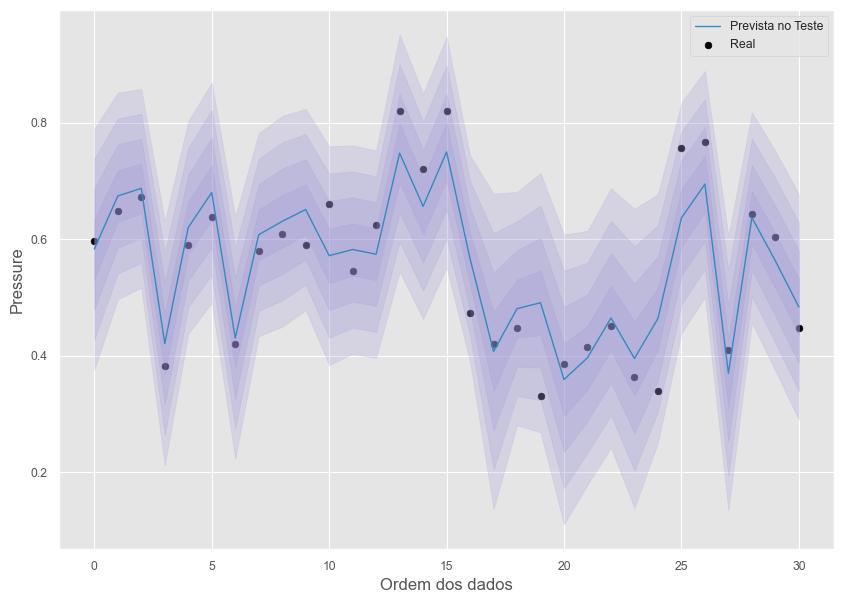

In [97]:
n = 31
t = range(n) 
mu = y_hat_test_mean
sigma = np.sqrt(y_hat_test_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, mu, label="Prevista no Teste", color="C1", lw=1)
plt.scatter(t, y_test, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma* (.5*shade), mu-sigma * (.5*shade), alpha=0.2, color="C2")

plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_test.png")
plt.show()

In [98]:
T = 1000

tf.keras.backend.set_learning_phase(1)

predict_stochastic = K.function([model.layers[0].input], [model.layers[-1].output])

y_hat_mc = np.array([predict_stochastic([X_train]) for _ in range(T)])

y_hat_mc = y_hat_mc.reshape(-1, y_train.shape[0]).T

C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [99]:
l = 10
y_hat_train_mean = np.mean(y_hat_mc, axis=1)
y_hat_train_variance = np.var(y_hat_mc, axis=1)
tau = l**2 * (1 - p_dropout) / (2 * X_train.shape[0] * lbd)
y_hat_train_variance += tau**-1

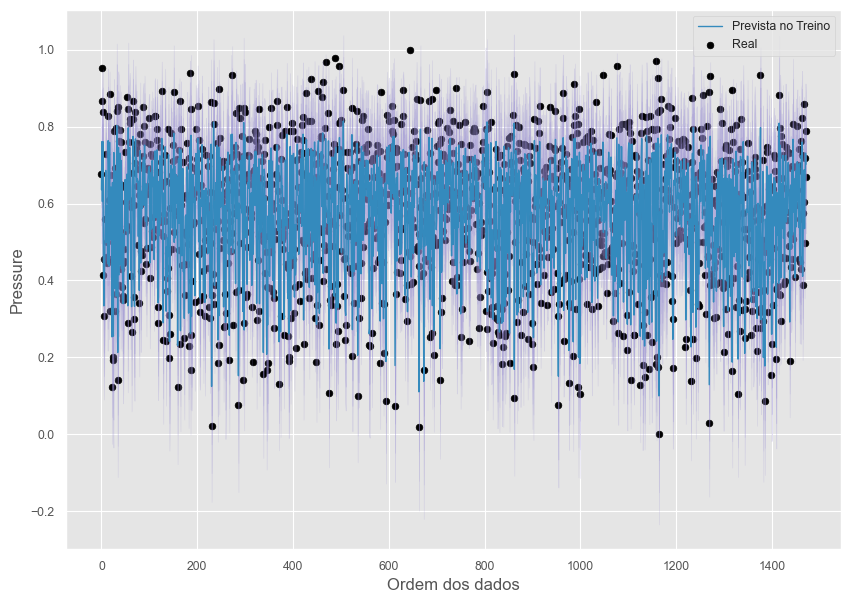

In [100]:
n = 1472
t = range(n) 
mu = y_hat_train_mean
sigma = np.sqrt(y_hat_train_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, mu, label="Prevista no Treino", color="C1", lw=1)
plt.scatter(t, y_train, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma* (.5*shade), mu-sigma * (.5*shade), alpha=0.2, color="C2") # 90% IC

plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_train.png")
plt.show()